In [1]:
import pandas as pd
import xgboost as xgb
import seaborn as sns
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, KFold



In [ ]:
def choose_scaler(X):

    skewness = X.apply(lambda x: skew(x.dropna()))

    # if skewnes is between 1 and -1 there is normal distribution
    if abs(skewness).max() < 1:

        scaler = StandardScaler()
    else:

        scaler = MinMaxScaler()
    
    return scaler


In [3]:
def remove_percentage_and_convert_column(df, column_name):
    df[column_name] = df[column_name].replace({'%': ''}, regex=True).astype(float) / 100
    return df

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df = pd.read_csv("listings.csv", encoding="utf-8")


In [4]:

print(df.head())

       id                          listing_url       scrape_id last_scraped  \
0   23163   https://www.airbnb.com/rooms/23163  20250316041547   2025-03-16   
1   23169   https://www.airbnb.com/rooms/23169  20250316041547   2025-03-16   
2   26755   https://www.airbnb.com/rooms/26755  20250316041547   2025-03-16   
3  782440  https://www.airbnb.com/rooms/782440  20250316041547   2025-03-16   
4  782489  https://www.airbnb.com/rooms/782489  20250316041547   2025-03-16   

        source                                 name  \
0  city scrape         Residence Karolina - KAROL12   
1  city scrape           Residence Masna - Masna302   
2  city scrape    Central Prague Old Town Top Floor   
3  city scrape  Central,Cheap&Lovely Miniapartment2   
4  city scrape  Central,Cheap&Lovely Miniapartment3   

                                         description  \
0  Unique and elegant apartment rental in Prague,...   
1  Masna studio offers a lot of space and privacy...   
2  Big and beautiful new a

In [5]:
df["price"] = df["price"].replace(r"[\$,]", "", regex=True).astype(float)

In [7]:
print(df.describe(include="all"))

                  id                         listing_url     scrape_id  \
count   1.010800e+04                               10108  1.010800e+04   
unique           NaN                               10108           NaN   
top              NaN  https://www.airbnb.com/rooms/23163           NaN   
freq             NaN                                   1           NaN   
mean    6.108089e+17                                 NaN  2.025032e+13   
std     5.380318e+17                                 NaN  3.906443e-03   
min     2.316300e+04                                 NaN  2.025032e+13   
25%     3.280956e+07                                 NaN  2.025032e+13   
50%     7.446005e+17                                 NaN  2.025032e+13   
75%     1.128376e+18                                 NaN  2.025032e+13   
max     1.376688e+18                                 NaN  2.025032e+13   

       last_scraped       source                              name  \
count         10108        10108         

In [ ]:
df.drop_duplicates()

In [6]:
print(df.isnull().sum())

id                                                  0
listing_url                                         0
scrape_id                                           0
last_scraped                                        0
source                                              0
name                                                0
description                                       241
neighborhood_overview                            5470
picture_url                                         0
host_id                                             0
host_url                                            0
host_name                                           1
host_since                                          1
host_location                                    2311
host_about                                       3976
host_response_time                                929
host_response_rate                                929
host_acceptance_rate                              391
host_is_superhost           

In [7]:
df["price"].describe()

count      8808.000000
mean       2730.524977
std        8349.628162
min         223.000000
25%        1242.750000
50%        1762.000000
75%        2641.000000
max      251025.000000
Name: price, dtype: float64

/var/folders/c2/5t4vwc1n1jdcwd15x4d_69cm0000gn/T/ipykernel_30527/3578779041.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


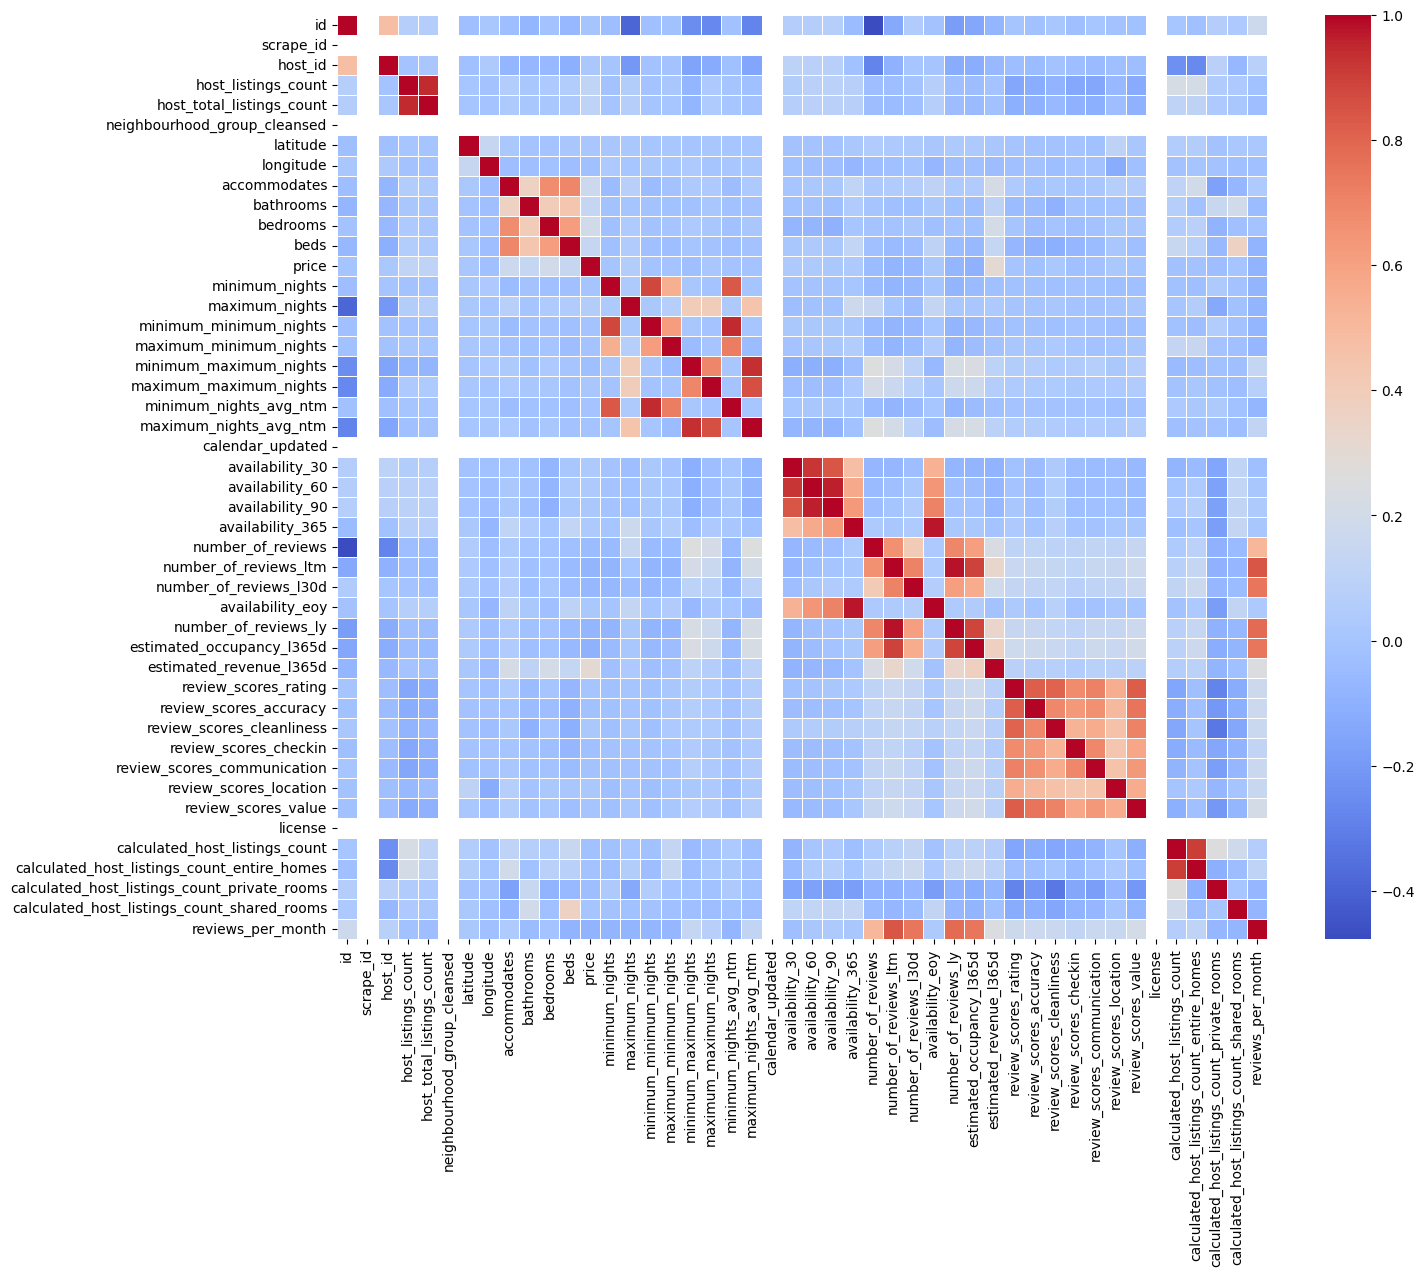

In [8]:
import seaborn as sns


corr_matrix = df.corr()


plt.figure(figsize=(15, 12))


sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", linewidths=0.5)

plt.show()

In [ ]:
drop_cols = [ "id", "name", "description", "license", "host_id", "host_name", "host_about", "neighborhood_overview", "neighbourhood_group_cleansed",
              "first_review", "last_review", "host_picture_url", "listing_url", "calendar_updated", "scrape_id", "last_scraped", "host_thumbnail_url", "neighbourhood"
    ]

In [9]:
#could make new columns from this column for instance: coffee machine 1/0
transform_columns = ["amenities"]

In [10]:
#host_thumbnail_url possibly getting user?
# "host_verifications", "host_has_profile_pic", host_identity_verified, has_availability, "instant_bookable"  binary
cat_columns = [ "host_url", "host_is_superhost", "host_verifications", "host_has_profile_pic", "host_identity_verified", "neighbourhood_cleansed" " property_type", "room_type", "bathrooms_text", "has_availability", "instant_bookable"
    ]

In [11]:
#probably drop, depends on final predictions table, could encode with sin and cos
date_col = ["host_since"]

In [12]:
#needs to be transformed to integer
perc_col = ["host_response_rate", "host_acceptance_rate"]

In [37]:
df = df.drop(columns = drop_cols, axis = 1)

In [13]:
#"host_location" locations that are not in Prague, filtering out?
df["host_location"]

0                                  Prague, Czechia
1                                  Prague, Czechia
2                                  Prague, Czechia
3                                  Prague, Czechia
4                                  Prague, Czechia
5                                  Prague, Czechia
6                                  Prague, Czechia
7                                  Prague, Czechia
8                                  Prague, Czechia
9                                  Prague, Czechia
10                                 Prague, Czechia
11                                 Prague, Czechia
12                                 Prague, Czechia
13                       Saint Moritz, Switzerland
14                                 Prague, Czechia
15                                 Prague, Czechia
16                                 Prague, Czechia
17                                 Prague, Czechia
18                                 Prague, Czechia
19                             

In [14]:
df["neighbourhood"]

0                                                      NaN
1                                                      NaN
2                      Prague, Hlavní město Praha, Czechia
3                                                      NaN
4                                                      NaN
5                                                      NaN
6                            Prague 1, Nove Mesto, Czechia
7                                          Prague, Czechia
8                                                      NaN
9                                                      NaN
10                                                     NaN
11                                                     NaN
12                                                     NaN
13                                                     NaN
14                     Prague, Hlavní město Praha, Czechia
15                     Prague, Hlavní město Praha, Czechia
16                     Prague, Hlavní město Praha, Czech

In [15]:
#could include more old prices since its previous scrape
df["host_response_rate"]

0        100%
1        100%
2        100%
3        100%
4        100%
5        100%
6        100%
7        100%
8        100%
9        100%
10       100%
11       100%
12       100%
13       100%
14       100%
15       100%
16       100%
17       100%
18       100%
19       100%
20       100%
21       100%
22       100%
23       100%
24       100%
25       100%
26        NaN
27       100%
28       100%
29       100%
30       100%
31       100%
32       100%
33       100%
34       100%
35       100%
36       100%
37       100%
38        NaN
39       100%
40       100%
41       100%
42       100%
43       100%
44       100%
45       100%
46       100%
47       100%
48        NaN
49       100%
50       100%
51       100%
52       100%
53       100%
54       100%
55       100%
56       100%
57         0%
58       100%
59       100%
60        NaN
61       100%
62       100%
63       100%
64       100%
65       100%
66        NaN
67       100%
68       100%
69        41%
70        41%
71    

In [16]:
for column in perc_col:
    df = remove_percentage_and_convert_column(df, column)

In [18]:
#new possible columns
new_columns =["Coffee maker","Dishwasher","Bed linens", "Pets allowed", "Free parking on premises", "Waterfront", "Wine glasses"]

df["amenities"]


0        ["Coffee maker", "Dishwasher", "Bed linens", "...
1        ["Patio or balcony", "Coffee maker", "Bed line...
2        ["AC - split type ductless system", "Coffee ma...
3        ["Coffee maker", "Bed linens", "Dishes and sil...
4        ["Coffee maker", "Bed linens", "Dishes and sil...
5        ["Coffee maker", "Bed linens", "Dishes and sil...
6        ["Coffee maker", "Bosch stainless steel induct...
7        ["Building staff", "Ethernet connection", "Win...
8        ["Coffee maker", "Dishwasher", "Bed linens", "...
9        ["Coffee maker", "Dishwasher", "Bed linens", "...
10       ["Coffee maker", "Dishwasher", "Bed linens", "...
11       ["Coffee maker", "Dishwasher", "Bed linens", "...
12       ["Coffee maker", "Dishwasher", "Bed linens", "...
13       ["Coffee maker", "Ethernet connection", "Bed l...
14       ["Coffee maker", "Bed linens", "Dishes and sil...
15       ["Bed linens", "Pets allowed", "Shampoo", "Hea...
16       ["Bed linens", "Pets allowed", "Shampoo", "Hea.

In [17]:
numerical_columns = df.select_dtypes(include=["number"]).columns
categorical_columns = df.select_dtypes(include=["object", "category"]).columns
categorical_columns = categorical_columns.drop("price", errors="ignore")
categorical_columns

Index(['listing_url', 'last_scraped', 'source', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_url', 'host_name',
       'host_since', 'host_location', 'host_about', 'host_response_time',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_verifications', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed',
       'property_type', 'room_type', 'bathrooms_text', 'amenities',
       'has_availability', 'calendar_last_scraped', 'first_review',
       'last_review', 'instant_bookable'],
      dtype='object')

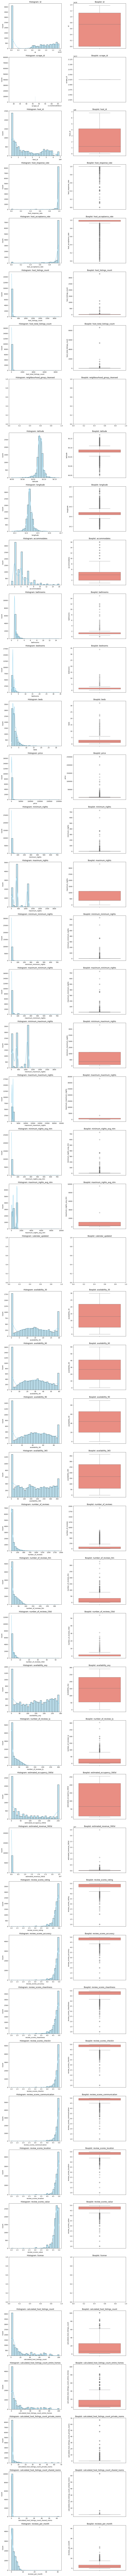

In [ ]:


fig, axes = plt.subplots(len(numerical_columns), 2, figsize=(12, 5 * len(numerical_columns)))


if len(numerical_columns) == 1:
    axes = [axes]


for i, col in enumerate(numerical_columns):

    sns.histplot(df[col].dropna(), kde=True, bins=30, color="skyblue", ax=axes[i][0])
    axes[i][0].set_title(f"Histogram: {col}")


    sns.boxplot(y=df[col].dropna(), color="salmon", ax=axes[i][1])
    axes[i][1].set_title(f"Boxplot: {col}")


plt.tight_layout()
plt.show()

In [ ]:


# Vykreslení grafů pro každý kategorický sloupec
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=df[col], palette="coolwarm", order=df[col].value_counts().index)
    plt.xticks(rotation=45)  # Natočení popisků pro lepší čitelnost
    plt.title(f"Rozložení hodnot ve sloupci: {col}")
    plt.show()

/var/folders/c2/5t4vwc1n1jdcwd15x4d_69cm0000gn/T/ipykernel_24846/3265171382.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="coolwarm", order=df[col].value_counts().index)


KeyboardInterrupt: 

In [18]:
X = df.drop("price",axis=1)
y = df["price"]

In [19]:
from sklearn.preprocessing import LabelEncoder
def label_encode(df, vars):
    le = LabelEncoder()

    for var in vars:
        df[var] = le.fit_transform(df[var])
    
    return df

In [28]:
X = label_encode(X, categorical_columns)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [23]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [24]:
X_train.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'minimum_nights',
       'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated',

In [31]:
print(X_test.head())

                       id  listing_url       scrape_id  last_scraped  source  \
1886             22900681         4696  20250316041547             0       0   
4007             53492952         7079  20250316041547             0       0   
3118             41994013         6153  20250316041547             0       0   
9513  1312995727830590411         3030  20250316041547             0       0   
8845  1257149893814943644         2336  20250316041547             0       0   

      name  description  neighborhood_overview  picture_url    host_id  \
1886  5387         3099                   2919          440  169479007   
4007    45         2280                   2919         7342    3736234   
3118  4030         6498                   2919         2993  239244930   
9513  8377         2296                    515         9486   78765288   
8845  8074         7895                   1347         9406  577476998   

      host_url  host_name  host_since  host_location  host_about  \
1886  

In [ ]:
#Robusnost vůči odchylkám
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

for train_index, val_index in kf.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    
    # Imputace pro numerické sloupce
    for col in numerical_columns:
        if X_train_fold[col].isnull().sum() > 0:
            # Rozdělení na data s chybějícími a známými hodnotami
            X_train_with_missing = X_train_fold[X_train_fold[col].isnull()]
            X_train_with_known = X_train_fold.dropna(subset=[col])
            
            # Oddělení cílové proměnné (sloupce s chybějícími hodnotami) od atributů
            y_train_with_known = X_train_with_known[col]
            X_train_with_known = X_train_with_known.drop(columns=[col])
            
            # Inicializace a trénování modelu pro imputaci
            random_forest = RandomForestRegressor(random_state=42)
            random_forest.fit(X_train_with_known, y_train_with_known)
            
            # Predikce pro chybějící hodnoty v trénovací sadě
            predicted_values = random_forest.predict(X_train_with_missing.drop(columns=[col]))
            
            # Doplnění chybějících hodnot do trénovacího datasetu
            X_train_fold.loc[X_train_fold[col].isnull(), col] = predicted_values

            # Predikce pro chybějící hodnoty ve validační sadě
            X_val_with_missing = X_val_fold[X_val_fold[col].isnull()]
            predicted_values_val = random_forest.predict(X_val_with_missing.drop(columns=[col]))
            
            # Doplnění chybějících hodnot do validačního datasetu
            X_val_fold.loc[X_val_fold[col].isnull(), col] = predicted_values_val

            # Predikce pro chybějící hodnoty v testovacím datasetu
            X_test_with_missing = X_test[X_test[col].isnull()]
            predicted_values_test = random_forest.predict(X_test_with_missing.drop(columns=[col]))

            # Doplnění chybějících hodnot do testovacího datasetu
            X_test.loc[X_test[col].isnull(), col] = predicted_values_test
    
    # Imputace pro kategorické sloupce
    for col in categorical_columns:
        if X_train_fold[col].isnull().sum() > 0:
            # Rozdělení na data s chybějícími a známými hodnotami
            X_train_with_missing = X_train_fold[X_train_fold[col].isnull()]
            X_train_with_known = X_train_fold.dropna(subset=[col])
            
            # Oddělení cílové proměnné (sloupce s chybějícími hodnotami) od atributů
            y_train_with_known = X_train_with_known[col]
            X_train_with_known = X_train_with_known.drop(columns=[col])
            
            # Inicializace a trénování modelu pro imputaci
            random_forest = RandomForestClassifier(random_state=42)
            random_forest.fit(X_train_with_known, y_train_with_known)
            
            # Predikce pro chybějící hodnoty v trénovací sadě
            predicted_values = random_forest.predict(X_train_with_missing.drop(columns=[col]))
            
            # Doplnění chybějících hodnot do trénovacího datasetu
            X_train_fold.loc[X_train_fold[col].isnull(), col] = predicted_values

            # Predikce pro chybějící hodnoty ve validační sadě
            X_val_with_missing = X_val_fold[X_val_fold[col].isnull()]
            predicted_values_val = random_forest.predict(X_val_with_missing.drop(columns=[col]))
            
            # Doplnění chybějících hodnot do validačního datasetu
            X_val_fold.loc[X_val_fold[col].isnull(), col] = predicted_values_val

            # Predikce pro chybějící hodnoty v testovacím datasetu
            X_test_with_missing = X_test[X_test[col].isnull()]
            predicted_values_test = random_forest.predict(X_test_with_missing.drop(columns=[col]))

            # Doplnění chybějících hodnot do testovacího datasetu
            X_test.loc[X_test[col].isnull(), col] = predicted_values_test

# Po skončení cross-validation fáze můžeme zkontrolovat, zda již nejsou žádné chybějící hodnoty
print(X_train.isnull().sum())
print(X_test.isnull().sum())

KeyboardInterrupt: 